# Road Sign Recognition

In [80]:
# Importing Necessary Libraries

from PIL import Image
import pandas as pd
import numpy  as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt
import matplotlib.image  as m_image

In [2]:
# Loading and Summarizing the labels csv file

label = pd.read_csv("labels.csv")

In [3]:
label

,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)
5,5,Speed limit (60km/h)
6,6,Speed limit (70km/h)
7,7,speed limit (80km/h)
8,8,Dont Go straight or left
9,9,Dont Go straight or Right


In [4]:
# Creating the Dictionary to store the class_names

lst1    = []
lst2    = []
for i in label["ClassId"]:
    lst1.append(i)
for j in label["Name"]:
    lst2.append(j)

In [5]:
classes = dict(zip(lst1,lst2))
classes

{0: 'Speed limit (5km/h)',
 1: 'Speed limit (15km/h)',
 2: 'Speed limit (30km/h)',
 3: 'Speed limit (40km/h)',
 4: 'Speed limit (50km/h)',
 5: 'Speed limit (60km/h)',
 6: 'Speed limit (70km/h)',
 7: 'speed limit (80km/h)',
 8: 'Dont Go straight or left',
 9: 'Dont Go straight or Right',
 10: 'Dont Go straight',
 11: 'Dont Go Left',
 12: 'Dont Go Left or Right',
 13: 'Dont Go Right',
 14: 'Dont overtake from Left',
 15: 'No Uturn',
 16: 'No Car',
 17: 'No horn',
 18: 'Speed limit (40km/h)',
 19: 'Speed limit (50km/h)',
 20: 'Go straight or right',
 21: 'Go straight',
 22: 'Go Left',
 23: 'Go Left or right',
 24: 'Go Right',
 25: 'keep Left',
 26: 'keep Right',
 27: 'Roundabout mandatory',
 28: 'watch out for cars',
 29: 'Horn',
 30: 'Bicycles crossing',
 31: 'Uturn',
 32: 'Road Divider',
 33: 'Traffic signals',
 34: 'Danger Ahead',
 35: 'Zebra Crossing',
 36: 'Bicycles crossing',
 37: 'Children crossing',
 38: 'Dangerous curve to the left',
 39: 'Dangerous curve to the right',
 40: 'Unk

In [31]:
# Retrieving the images and their labels

data = []
labels = []
classs = 58
cur_path =  os.getcwd()
for i in range(classs):
    path = os.path.join(cur_path,"traffic_Data/TRAIN/",str(i))
    images = os.listdir(path)
    
    for a in images:
        try:
            image = Image.open(path + '\\' + a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error In Loading the Images")
print("Dataset Loaded")

Dataset Loaded


In [32]:
# Converting lists into numpy_arrays

data   = np.array(data)
labels = np.array(labels)

In [34]:
print("images_shape:",data.shape,"labels_shape:",labels.shape)

images_shape: (4170, 30, 30, 3) labels_shape: (4170,)


In [35]:
# Splitting the dataset to train and test

x_train, x_test, y_train, y_test = train_test_split(data,labels)

In [36]:
# Converting the labels into one-hot encoding

y_train = to_categorical(y_train,58)
y_test  = to_categorical(y_test,58)

In [37]:
# Designing the CNN Model

model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(5,5),activation="relu",input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32,kernel_size=(5,5),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(rate=0.25))

model.add(Dense(58,activation="softmax"))

In [38]:
# Compilation of the CNN Model

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [39]:
# Training the CNN Model

model.fit(x_train,y_train,batch_size=32,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
98/98 [==============================] - 21s 171ms/step - loss: 4.2099 - accuracy: 0.2037 - val_loss: 2.1919 - val_accuracy: 0.5149
Epoch 2/5
98/98 [==============================] - 17s 178ms/step - loss: 1.8189 - accuracy: 0.5414 - val_loss: 1.0788 - val_accuracy: 0.7555
Epoch 3/5
98/98 [==============================] - 17s 178ms/step - loss: 1.1923 - accuracy: 0.6968 - val_loss: 0.7929 - val_accuracy: 0.8274
Epoch 4/5
98/98 [==============================] - 18s 180ms/step - loss: 0.8747 - accuracy: 0.7646 - val_loss: 0.5790 - val_accuracy: 0.8648
Epoch 5/5
98/98 [==============================] - 17s 178ms/step - loss: 0.7067 - accuracy: 0.8059 - val_loss: 0.4844 - val_accuracy: 0.8869


In [111]:
# Testing the Trained CNN Model

image_path = cur_path + "\\" + "traffic_Data\\TEST\\016_1_0019_1_j.png"
img        = Image.open(image_path)
img        = img.resize((30,30))
img        = np.expand_dims(img,axis=0)
img        = np.array(img)
result = model.predict(img)[0]
result = result.argmax()
print(result)

1/1 [==============================] - 0s 22ms/step
16


In [112]:
classes[result]

'No Car'

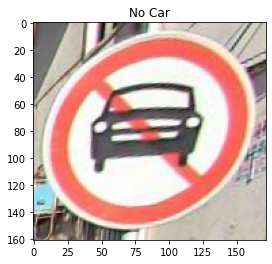

In [113]:
image = m_image.imread(image_path)
plt.imshow(image)
plt.title(classes[result])
plt.show()